In [126]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
np.random.seed(10)


In [127]:
a = 5

reward = np.random.uniform(0, 1, size=(a,a))


pi_1 = np.random.uniform(0, 1, size=(a))
pi_1 = pi_1/np.sum(pi_1)
pi_2 = np.random.uniform(0, 1, size=(a))
pi_2 = pi_2/np.sum(pi_2)

dpi_1 = np.random.uniform(0, 1, size=(a))
dpi_1 = pi_1/np.sum(pi_1)
dpi_2 = np.random.uniform(0, 1, size=(a))
dpi_2 = pi_2/np.sum(pi_2)


Q_tilde_1 = np.zeros(a)
for action_1 in range(a):
    for action_2 in range(a):
        Q_tilde_1[action_1]+= pi_2[action_2]*reward[action_1, action_2]
Q_tilde_2 = np.zeros(a)
for action_1 in range(a):
    for action_2 in range(a):
        Q_tilde_2[action_2]+= pi_1[action_1]*reward[action_1, action_2]
        
        
# dpi_1 =     Q_tilde_1    
# dpi_2 =     Q_tilde_2    
# print(pi_1)



In [128]:
eta = 0.1

new_pi_1 = pi_1+eta*(dpi_1-pi_1)
new_pi_2 = pi_2+eta*(dpi_2-pi_2)

value_1 = 0
for action_1 in range(a):
    for action_2 in range(a):
        value_1+=(pi_2[action_2]*new_pi_1[action_1] - new_pi_1[action_1]*new_pi_2[action_2])*reward[action_1, action_2]
        
value_2 = 0
for action_1 in range(a):
    for action_2 in range(a):
        value_2+=(pi_1[action_1]*new_pi_2[action_2] - new_pi_1[action_1]*new_pi_2[action_2])*reward[action_1, action_2]
        
        
total_val = value_1+value_2
print(total_val)

0.0


In [129]:
N = 10000
time = 100
result = np.zeros(time)
v1 = np.zeros(time)
v2 = np.zeros(time)
for i in range(time):
    eta= 0.01
    reward = np.random.uniform(0, 1, size=(a,a))

    pi_1 = np.random.uniform(0, 1, size=(a))
    pi_1 = pi_1/np.sum(pi_1)
    pi_2 = np.random.uniform(0, 1, size=(a))
    pi_2 = pi_2/np.sum(pi_2)
    
    Q_tilde_1 = np.zeros(a)
    for action_1 in range(a):
        for action_2 in range(a):
            Q_tilde_1[action_1]+= pi_2[action_2]*reward[action_1, action_2]
    Q_tilde_2 = np.zeros(a)
    for action_1 in range(a):
        for action_2 in range(a):
            Q_tilde_2[action_2]+= pi_1[action_1]*reward[action_1, action_2]


    dpi_1 =     Q_tilde_1    
    dpi_2 =     Q_tilde_2   
#     dpi_1 = np.random.uniform(0, 1, size=(a))
    dpi_1 = dpi_1/np.sum(dpi_1)
#     dpi_2 = np.random.uniform(0, 1, size=(a))
    dpi_2 = dpi_2/np.sum(dpi_2)
    

    new_pi_1 = pi_1+eta*(dpi_1-pi_1)
    new_pi_2 = pi_2+eta*(dpi_2-pi_2)

    value_1 = 0
    for action_1 in range(a):
        for action_2 in range(a):
            value_1+=(pi_2[action_2]*new_pi_1[action_1] - new_pi_1[action_1]*new_pi_2[action_2])*reward[action_1, action_2]

    value_2 = 0
    for action_1 in range(a):
        for action_2 in range(a):
            value_2+=(pi_1[action_1]*new_pi_2[action_2] - new_pi_1[action_1]*new_pi_2[action_2])*reward[action_1, action_2]


    result[i] = value_1+value_2
    v1[i] = value_1
    v2[i] = value_2
#     if result[i]>0:
#         print(pi_1, pi_2, new_pi_1,new_pi_2)
#         print()

In [159]:
n=2
N = 10000
time = 1000
tau = 1    
eta= 1/(2*n*tau)

result = np.zeros(time)
v1 = np.zeros(time)
v2 = np.zeros(time)
KL1 = np.zeros(time)
KL2 = np.zeros(time)
for i in range(time):
    reward = np.random.uniform(0, 1, size=(a,a))

    pi_1 = np.random.uniform(0, 1, size=(a))
    pi_1 = pi_1/np.sum(pi_1)
    pi_2 = np.random.uniform(0, 1, size=(a))
    pi_2 = pi_2/np.sum(pi_2)
    
    Q_tilde_1 = np.zeros(a)
    for action_1 in range(a):
        for action_2 in range(a):
            Q_tilde_1[action_1]+= pi_2[action_2]*reward[action_1, action_2]
    Q_tilde_2 = np.zeros(a)
    for action_1 in range(a):
        for action_2 in range(a):
            Q_tilde_2[action_2]+= pi_1[action_1]*reward[action_1, action_2]


#     dpi_1 =     Q_tilde_1    
#     dpi_2 =     Q_tilde_2   
#     dpi_1 = np.random.uniform(0, 1, size=(a))
# #     dpi_1 = dpi_1/np.sum(dpi_1)
#     dpi_2 = np.random.uniform(0, 1, size=(a))
#     dpi_2 = dpi_2/np.sum(dpi_2)
    

    new_pi_1 = pi_1**(1- eta*tau)*np.exp(eta*Q_tilde_1)
    new_pi_2 = pi_2**(1- eta*tau)*np.exp(eta*Q_tilde_2)
    new_pi_1 = new_pi_1/np.sum(new_pi_1)
    new_pi_2 = new_pi_2/np.sum(new_pi_2)
    
    value_1 = 0
    KL_1 = 0
    for action_1 in range(a):
        KL_1 += (1/eta - tau)*new_pi_1[action_1]*(np.log(new_pi_1[action_1]/pi_1[action_1]))
#         KL_1 += (1/eta)*pi_1[action_1]*(np.log(pi_1[action_1]/new_pi_1[action_1]))
        value_1+=Q_tilde_1[action_1]*new_pi_1[action_1]
        for action_2 in range(a):
#             value_1+=(pi_2[action_2]*new_pi_1[action_1] - new_pi_1[action_1]*new_pi_2[action_2])*reward[action_1, action_2]
            value_1 -= new_pi_1[action_1]*new_pi_2[action_2]*reward[action_1, action_2]

    value_2 = 0
    KL_2 = 0

    for action_2 in range(a):
        KL_2 += (1/eta - tau)*new_pi_2[action_2]*(np.log(new_pi_2[action_2]/pi_2[action_2]))
#         KL_2 += (1/eta)*pi_2[action_2]*(np.log(pi_2[action_2]/new_pi_2[action_2]))
#         KL_2 += (1/eta)*new_pi_2[action_2]*(np.log(new_pi_2[action_2]/pi_2[action_2]))
        for action_1 in range(a):
            value_2+=(pi_1[action_1]*new_pi_2[action_2] - new_pi_1[action_1]*new_pi_2[action_2])*reward[action_1, action_2]

    
    result[i] = value_1+value_2
    v1[i] = value_1
    v2[i] = value_2
    KL1[i] = KL_1
    KL2[i] = KL_2
#     if result[i]>0:
#         print(pi_1, pi_2, new_pi_1,new_pi_2)
#         print()

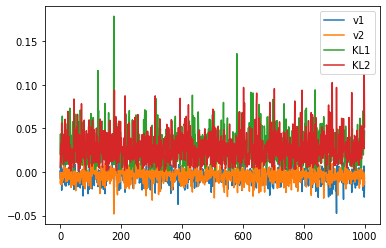

In [160]:
# plt.plot(result)
plt.plot(v1, label="v1")
plt.plot(v2, label="v2")
plt.plot(KL1, label="KL1")
plt.plot(KL2, label="KL2")
plt.legend()


-0.012130362724462327
-0.006105952362964066
0.004326021790157744


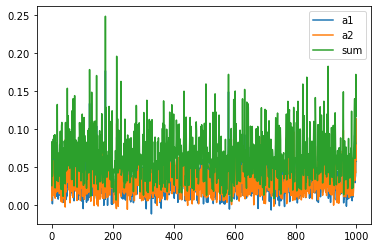

In [161]:
plt.plot(KL1-v1, label="a1")
plt.plot(KL2-v2, label="a2")
plt.plot(KL2-v2+KL1-v1, label="sum")
# plt.plot(v1, label="v1")
# plt.plot(v1, label="v1")
plt.legend()
print(np.min(KL1-v1))
print(np.min(KL2-v2))
print(np.min(KL2-v2+KL1-v1))


In [52]:
pi_1 = np.random.uniform(0, 1, size=(a))
pi_1 = pi_1/np.sum(pi_1)
pi_2 = np.random.uniform(0, 1, size=(a))
pi_2 = pi_2/np.sum(pi_2)


diff = 0
for action in range(a):
    diff += (pi_1[action]-pi_2[action])*np.log(pi_2[action])
    
print(diff)

-0.24333594349342555


In [63]:
a = 2
N = 100
diffs = []
for i in range(N):
    pi_1 = np.random.uniform(0.1, 0.9, size=(a))
    pi_1 = pi_1/np.sum(pi_1)
    pi_2 = np.random.uniform(0.1, 0.9, size=(a))
    pi_2 = pi_2/np.sum(pi_2)


    diff = 0
    for action in range(a):
        diff += (pi_1[action]-pi_2[action])*np.log(pi_2[action])
    if diff >0:
        print(pi_1, pi_2)
    diffs.append(diff)


[0.38888613 0.61111387] [0.45242614 0.54757386]
[0.46083342 0.53916658] [0.49386999 0.50613001]
[0.7074573 0.2925427] [0.67626225 0.32373775]
[0.73267375 0.26732625] [0.51441756 0.48558244]
[0.28484524 0.71515476] [0.38197122 0.61802878]
[0.33130269 0.66869731] [0.34416664 0.65583336]
[0.2709022 0.7290978] [0.40897288 0.59102712]
[0.4092217 0.5907783] [0.43811088 0.56188912]
[0.25851429 0.74148571] [0.43600751 0.56399249]
[0.81768803 0.18231197] [0.59859704 0.40140296]
[0.45895069 0.54104931] [0.46318354 0.53681646]
[0.320674 0.679326] [0.34007942 0.65992058]
[0.24581779 0.75418221] [0.32346772 0.67653228]
[0.70911828 0.29088172] [0.61413318 0.38586682]
[0.18339218 0.81660782] [0.46336432 0.53663568]
[0.36469122 0.63530878] [0.43004564 0.56995436]
[0.15658544 0.84341456] [0.23458745 0.76541255]
[0.44051618 0.55948382] [0.47748594 0.52251406]
[0.5280131 0.4719869] [0.51314188 0.48685812]


[-0.02825583693792207, -0.12467426863321326, -0.02589380174967164, 0.012128060916908032, 0.000810098848195908, -0.10447815605886906, -0.24660992745096094, -0.008325500848360097, -0.0492817018686824, -0.005270974707829185, -0.06188683964462319, -0.3196193127411626, -0.014287228894940884, -0.6630517232505142, -0.2002141931479789, -0.034069581373595254, -0.08067947267894258, -0.9090682458270586, 0.022979749243343693, -0.909436559431895, -0.010830801609399079, -0.0008705111570862789, -0.42506518701740303, 0.012590376969532469, 0.046736028403244166, -0.010574315369299925, -0.07479455115743724, -0.06901047354485117, -0.2776248430552566, -0.2463747031627701, -0.23907183270053042, -0.0008808286288544444, -0.04831815776497067, -0.013617417167039889, -0.049183090443315154, 0.008294427812383846, -0.06192530151212365, -0.10101660030877649, 0.05083942953166852, -0.1090517087123222, 0.007188567297865902, 0.045683465125607114, -0.28819784578144475, -0.7434766531249605, -0.19656709134869285, -0.525903

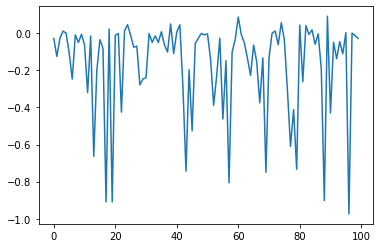

In [64]:
plt.plot(diffs)
print(diffs)